In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-vaccine-myths/reddit_vm.csv


In [110]:
vaccine = pd.read_csv('/kaggle/input/reddit-vaccine-myths/reddit_vm.csv')
vaccine.head(5)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [111]:
vaccine.shape

(1530, 8)

In [112]:
vaccine.agg({'created': 'nunique', 'score': 'nunique', 'comms_num':'nunique', 'body' : 'nunique'})

created      1530
score          42
comms_num      36
body         1142
dtype: int64

In [113]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1530 non-null   object 
 1   score      1530 non-null   int64  
 2   id         1530 non-null   object 
 3   url        452 non-null    object 
 4   comms_num  1530 non-null   int64  
 5   created    1530 non-null   float64
 6   body       1164 non-null   object 
 7   timestamp  1530 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 95.8+ KB


In [114]:
vaccine[vaccine.duplicated()]

,title,score,id,url,comms_num,created,body,timestamp


No Duplicates found

In [115]:
vaccine.describe()

,score,comms_num,created
count,1530.000000,1530.000000,1.530000e+03
mean,3.721569,1.894771,1.543342e+09
std,30.651007,16.502889,7.029324e+07
min,-12.000000,0.000000,1.389624e+09
25%,1.000000,0.000000,1.554245e+09
50%,1.000000,0.000000,1.568873e+09
75%,3.000000,1.000000,1.581114e+09
max,1189.000000,596.000000,1.621050e+09


In [116]:
null_values = vaccine.isnull().sum()/len(vaccine)
for i in range (len(null_values.index)) :
    print("Column", null_values.index[i], "has ", null_values[i]*100, "% null values") 

temp = (null_values.index[1])
temp

Column title has  0.0 % null values
Column score has  0.0 % null values
Column id has  0.0 % null values
Column url has  70.45751633986929 % null values
Column comms_num has  0.0 % null values
Column created has  0.0 % null values
Column body has  23.92156862745098 % null values
Column timestamp has  0.0 % null values


'score'

In [117]:
vaccine['year'] = pd.DatetimeIndex(vaccine['timestamp']).year
vaccine['month'] = pd.DatetimeIndex(vaccine['timestamp']).month
vaccine.head(5)

,title,score,id,url,comms_num,created,body,timestamp,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,2021,2
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,2021,2
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,2021,2


<AxesSubplot:>

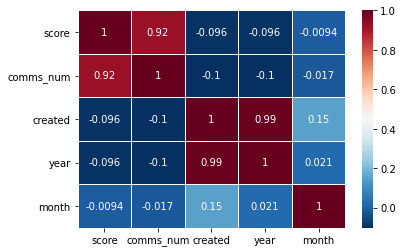

In [118]:
pearsoncorrelation = vaccine.corr(method ='pearson')

sns.heatmap(pearsoncorrelation, xticklabels = pearsoncorrelation.columns,
           yticklabels= pearsoncorrelation.columns,
           cmap = 'RdBu_r', 
           annot = True,
           linewidth = 0.5)

<AxesSubplot:>

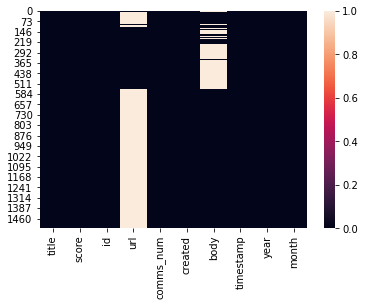

In [119]:
sns.heatmap(vaccine.isnull())

<AxesSubplot:xlabel='year', ylabel='count'>

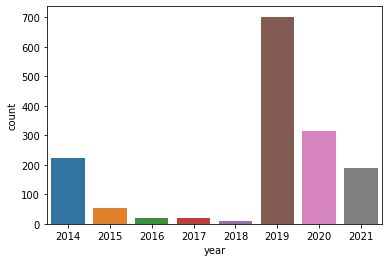

In [120]:
sns.countplot(data=vaccine,x='year')

In [121]:
vaccine_2 = vaccine[['title', 'score','body', 'comms_num', 'year', 'month']]
vaccine_2.query('title == "Comment"').head()

,title,score,body,comms_num,year,month
6,Comment,1,Your OP. It's not a myth. Only one vaccine con...,0,2019,3
8,Comment,0,Because Anti-Vaxxers have no sense,0,2020,4
9,Comment,0,"What do you mean by ""your OP"". I am fairly new...",0,2019,3
10,Comment,1,"When they say there's no thimerasol, they mean...",0,2019,3
11,Comment,2,"The ""myth"" you're debunking is in regards to t...",0,2019,3


<AxesSubplot:>

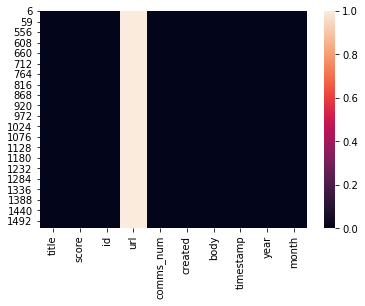

In [122]:
sns.heatmap(vaccine.query('title == "Comment"').isnull())

body is never null when the title is comment

## Data Preprocessing

In [123]:
vaccine = vaccine[['title', 'score','body', 'comms_num', 'year', 'month']]
vaccine

,title,score,body,comms_num,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,NaN,0,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,NaN,1,2021,2
2,Coronavirus variants could fuel Canada's third...,6,NaN,0,2021,2
3,Canadian government to extend COVID-19 emergen...,1,NaN,0,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,NaN,0,2021,2
...,...,...,...,...,...,...
1525,Comment,2,Because it wasn’t controlled and while the kid...,0,2019,4
1526,Comment,7,I’ve only heard about that with the chickenpox...,0,2019,4
1527,Comment,1,"Night, darling.\n\n👋🏻",0,2019,4
1528,Comment,1,You said it's the only point you can imagine a...,0,2019,4


In [124]:
vaccine['title'] = vaccine['title'].astype(str)
vaccine['body'] = vaccine['body'].astype(str)

In [125]:
vaccine['text'] = vaccine.apply(lambda x: x['body'] if x['title'] == "Comment" else x['title'], axis=1)

In [126]:
vaccine['text'] = vaccine['text'].astype(str)

In [127]:
vaccine['text'] = vaccine['text'].apply(lambda word: " ".join(word.lower()
                                                                for word in word.split()))

In [128]:
vaccine

,title,score,body,comms_num,year,month,text
0,Health Canada approves AstraZeneca COVID-19 va...,7,nan,0,2021,2,health canada approves astrazeneca covid-19 va...
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,nan,1,2021,2,covid-19 in canada: 'vaccination passports' a ...
2,Coronavirus variants could fuel Canada's third...,6,nan,0,2021,2,coronavirus variants could fuel canada's third...
3,Canadian government to extend COVID-19 emergen...,1,nan,0,2021,2,canadian government to extend covid-19 emergen...
4,Canada: Pfizer is 'extremely committed' to mee...,6,nan,0,2021,2,canada: pfizer is 'extremely committed' to mee...
...,...,...,...,...,...,...,...
1525,Comment,2,Because it wasn’t controlled and while the kid...,0,2019,4,because it wasn’t controlled and while the kid...
1526,Comment,7,I’ve only heard about that with the chickenpox...,0,2019,4,i’ve only heard about that with the chickenpox...
1527,Comment,1,"Night, darling.\n\n👋🏻",0,2019,4,"night, darling. 👋🏻"
1528,Comment,1,You said it's the only point you can imagine a...,0,2019,4,you said it's the only point you can imagine a...


In [129]:
from nltk.corpus import stopwords

In [131]:
vaccine['text'] = vaccine['text'].apply(lambda word: " ".join(word for word in word.split() if word not in stopwords.words('english')))

In [132]:
vaccine

,title,score,body,comms_num,year,month,text
0,Health Canada approves AstraZeneca COVID-19 va...,7,nan,0,2021,2,health canada approves astrazeneca covid-19 va...
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,nan,1,2021,2,covid-19 canada: 'vaccination passports' near ...
2,Coronavirus variants could fuel Canada's third...,6,nan,0,2021,2,coronavirus variants could fuel canada's third...
3,Canadian government to extend COVID-19 emergen...,1,nan,0,2021,2,canadian government extend covid-19 emergency ...
4,Canada: Pfizer is 'extremely committed' to mee...,6,nan,0,2021,2,canada: pfizer 'extremely committed' meeting v...
...,...,...,...,...,...,...,...
1525,Comment,2,Because it wasn’t controlled and while the kid...,0,2019,4,wasn’t controlled kids gain immunity experienc...
1526,Comment,7,I’ve only heard about that with the chickenpox...,0,2019,4,i’ve heard chickenpox (which also deadly e.g. ...
1527,Comment,1,"Night, darling.\n\n👋🏻",0,2019,4,"night, darling. 👋🏻"
1528,Comment,1,You said it's the only point you can imagine a...,0,2019,4,said point imagine way justify ignoring said o...
